features为：tensor([-0.3849, -0.6393]), 
labels为：tensor([5.6061])
1000 
 1000
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206

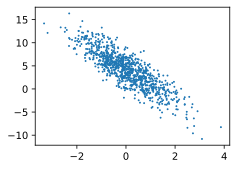

In [1]:
# chao
# 时间：2023/11/16 11:16

import random
import torch
from d2l import torch as d2l

# 生成一个数据集
def synthetic_data(w, b, num_exmples): #@save
    '''
    定义一个人工合成数据的方法，y=Xw+b+噪声
    :param w: 权重
    :param b: 偏置
    :param num_exmples: 样本数量
    :return:
    '''
    X = torch.normal(0, 1, (num_exmples, len(w)))
    # 生成符合参数要求的随机数张量，其中(num_exmples, len(w))是作为输出X的shape
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000) #调用生成随机数矩阵方法，生成一个featrues（1000x2）和labels
print(f'features为：{features[0]}, \nlabels为：{labels[0]}')

d2l.set_figsize()
a = features[:, 1].detach().numpy() #按照索引查询features的第二列元素，进行分离，然后转换为numpy数组
b = labels.detach().numpy()
print(a.size, '\n', b.size)
d2l.plt.scatter(a, b, 1);
# d2l.plt.show()

# 读取数据集
def data_iter(batch_size, features, labels): #@save
    '''
    读取数据集，返回小批量的样本数据
    :param batch_size: 批量大小
    :param features: 特征矩阵
    :param lables: 标签矩阵
    :return:
    '''
    num_examples = len(features) # 计算样本数量
    indices = list(range(num_examples)) 
    print(indices)
    random.shuffle(indices) 
    print('打乱顺序后的样本索引列表为：\n',indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i: min(i + batch_size, num_examples)])
        print('根据batch_size的数量，取出的索引位置：\n',batch_indices)
        yield features[batch_indices], labels[batch_indices] 

batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

